# מעבדה 2 - ניתוח השפעת פיזור נקודות בקרה על פתרון תצלום


In [1]:
import numpy as np
from numpy.linalg import solve, inv
from matplotlib import pyplot as plt

## שלב 1 - בניית המודל והנתונים 

- *התקינו מחדש את המודול MatrixMethods*
- *במהלך המעבדה נשתמש בקודים ממעבדה קודמת*
- *ניתן לכתוב את הפונקציות ב-Pycharm ולייבא אותן ל-Jupyter במקרה הצורך*

In [2]:
from Camera import Camera
import PhotoViewer as pv
from SingleImage import SingleImage
import MatrixMethods

### חלק א'

מהו המודל שאנחנו רוצים לבדוק?



נבנה את הנתונים

- מספר נקודות שיתן לבדוק את המודל
     - לפחות שלוש נקודות

- המבנה הפשוט ביותר
    - גם למימוש

- במיקום הנוח ביותר

- הפיזור ש"מרגיש" לנו הכי חסון (יציב גיאומטרית)


In [3]:
from ObjectsSynthetic import *
edgeSize = 10
squere = np.array([[-edgeSize/2,edgeSize/2,0],[edgeSize/2,edgeSize/2,0],[edgeSize/2,-edgeSize/2,0],[-edgeSize/2,-edgeSize/2,0]])

נבחר את פרמטרי המודל

 - נבחר בפרמטרים הנוחים ביותר 
    - מספרים ו/או זוויות שלמים ו"יפים" 

- נתחיל מהמודל הכי פשוט שאפשר
    - תצלום אנכי מעל הראשית
    

In [4]:
# define camera
focal_length = 35
sensor_size = 25
camera1 = Camera(focal_length, np.array([0, 0]), None, None, None, sensor_size)

# define image
omega = 0
phi = 0
kappa = 0
Z = 50
img1 = SingleImage(camera1)
img1.exteriorOrientationParameters = np.array([[0, 0, Z, omega, phi, kappa]])

ציירו את המודל והנתונים במערכת העולם 

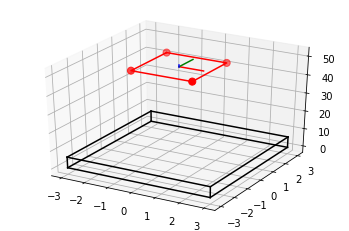

In [5]:
fig1 = plt.figure()
ax = fig1.add_subplot(111, projection='3d')
scale = 100
img1.drawSingleImage(squere, scale, ax)
plt.scatter(squere)

נייצר את הנתונים לאחר ההתמרה

In [7]:
imagePoints1 = img1.GroundToImage(squere)

נבנה את המודל אותו נרצה לבדוק

הכלל הקו-לינארי
הפונקציה נבנתה סמסטר קודם

In [ ]:
#     def ImageToGround_GivenZ(self, imagePoints, Z_values):
#         """
#         Compute corresponding ground point given the height in world system

#         :param imagePoints: points in image space
#         :param Z_values: height of the ground points


#         :type Z_values: np.array nx1
#         :type imagePoints: np.array nx2
        

#         :return: corresponding ground points

#         :rtype: np.ndarray

#         """
#         camera_points = self.ImageToCamera(imagePoints)

#         # exterior orientation parameters

#         omega = self.exteriorOrientationParameters[3]
#         phi = self.exteriorOrientationParameters[4]
#         kapa = self.exteriorOrientationParameters[5]
#         X0 = self.exteriorOrientationParameters[0]
#         Y0 = self.exteriorOrientationParameters[1]
#         Z0 = self.exteriorOrientationParameters[2]

#         Z = Z_values
#         R = Compute3DRotationMatrix(omega, phi, kapa)
#         X = np.zeros(len(Z))
#         Y = np.zeros(len(Z))

נוודא שהדגימות והמודל נכונים

 - נפתור את התאום עם הדגימות שיצרנו ונוודא שזהו המודל הנכון


In [ ]:
groundPoints = img1.ComputeExteriorOrientation(imagePoints1,)

נוסיף רעש מדידה עבור הנקודות המקוריות  

הדגימות נלקחות באופן שרירותי מתוך התפלגות נורמלית 
$$ x, y\sim (\mu, \sigma) $$

-  נוסיף רעש מדידה של 1 ס"מ: $\sigma=0.01$

In [ ]:
samples+ noise = np.random.normal(0, 0.01, 1)

### חלק ב'

נבדוק את המודל עבור פיזור שונה של נקודות הבקרה
  - כיצד לדעתכם יש לשנות את המודל כך שנקבל פיזור שונה של נקודות הבקרה?

In [ ]:
צמצום המרחקים, לאורך קו ישר וכו

הגדירו את פרמטרי המודל 

In [ ]:
הגדרת נק בקרה והתצלום

ציירו את המודל והנתונים במערכת העולם 

נייצר את הנתונים לאחר ההתמרה

נבנה את המודל אותו נרצה לבדוק

נוודא שהדגימות והמודל נכונים

 - נפתור את התאום עם הדגימות שיצרנו ונוודא שזהו המודל הנכון



נוסיף רעש מדידה עבור הנקודות המקוריות  

הדגימות נלקחות באופן שרירותי מתוך מהתפלגות נורמלית 
$$ x, y\sim (\mu, \sigma) $$

-  נוסיף רעש מדידה של 1 ס"מ: $\sigma=0.01$

## שלב 2 -  השפעת פיזור נקודות בקרה על פתרון תצלום 

- כמה תצלומים נדרשים על מנת לבדוק את השפעת פיזור הנקודות על הפתרון?
- איך ניתן לייצר מספר תצלומים עם פיזורים שונים של נקודות הבקרה לצורך הבדיקה?
  - מהם הגורימים המשפיעים על שינוי בפיזור נקודות הבקרה בתצלום?
  - תארו את השלבים הנדרשים לבניה?


הגדירו מספר תצלומים (לפחות 8 תצלומים) מסביב לנקודות בקרה שהגדרתם בשלב ראשון

In [ ]:
האם צריך הרכנות

חשבו את האוריינטציה חיצונית עבור כל אחד מהתצלומים שיצרתם

In [ ]:
לפני כן צריך לחשב את הדגימות?

ניתוח תוצאות

 - השוו את התוצאות שקיבלתם עם הערכים הידועים
 - הציגו את הדיוק של כל פתרון 

 - האם פיזור שונה של נקודות בקרה בתצלום הוביל לתוצאות שונות?
   - התייחסו לקונפיגורציות שונות

האם קיים הבדל בין תוצאות הפתרון בין תצלום אנכי לתצלום עם אוריינטציה כללית? נמקו